### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [2]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


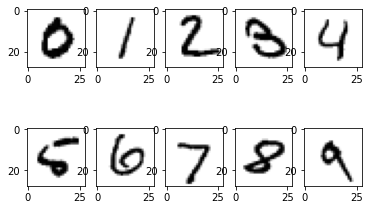

In [4]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [5]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [9]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,30,40,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [10]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 12, 8000)

Iteration:  0  Error:  4109.55645818106
Iteration:  100  Error:  1983.762387221355
Iteration:  200  Error:  564.2348944364198
Iteration:  300  Error:  389.74147123710463
Iteration:  400  Error:  319.1465246344703
Iteration:  500  Error:  250.5759691561764
Iteration:  600  Error:  251.36137442758422


KeyboardInterrupt: 

In [30]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[ 83.   0.   1.   0.   1.   1.   3.   1.   0.   0.]
 [  0. 123.   2.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   1. 107.   2.   1.   0.   2.   0.   2.   0.]
 [  0.   0.   0.  98.   0.   3.   0.   3.   4.   0.]
 [  0.   0.   1.   0. 100.   0.   1.   1.   1.   3.]
 [  0.   0.   0.   5.   0.  79.   2.   1.   1.   1.]
 [  1.   0.   0.   0.   1.   1.  79.   0.   0.   0.]
 [  0.   0.   3.   1.   0.   0.   0.  91.   1.   4.]
 [  0.   1.   2.   1.   1.   2.   0.   0.  80.   4.]
 [  1.   1.   0.   0.   6.   1.   0.   1.   0.  82.]]
The accuracy is  92.2


In [8]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [140]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [ ]:
best_sizes = [784,50,60,10]
best_beta = 2.5
best_momentum = 1.3
best_lr = 3.2  # best learning rate
best_niterations = 4000
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4138.510072248634
Iteration:  100  Error:  1043.726477242384
Iteration:  200  Error:  466.7149575883766
Iteration:  300  Error:  334.35401231423185
Iteration:  400  Error:  254.05459660778692
Iteration:  500  Error:  218.71678846228127
Iteration:  600  Error:  183.16084762297606
Iteration:  700  Error:  152.18885851705323
Iteration:  800  Error:  127.35053249604368
Iteration:  900  Error:  111.85571941651509
Iteration:  1000  Error:  102.51304732907765
Iteration:  1100  Error:  97.22646840333799
Iteration:  1200  Error:  95.05452416962996
Iteration:  1300  Error:  95.1231735592035
Iteration:  1400  Error:  94.57649273106246
Iteration:  1500  Error:  98.96685177278735
Iteration:  1600  Error:  106.70078338622861
Iteration:  1700  Error:  916.9013487988167
Iteration:  1800  Error:  347.94649984552825
Iteration:  1900  Error:  143.9932955248283
Iteration:  2000  Error:  121.42076784743345
Iteration:  2100  Error:  116.48768648986062
Iteration:  2200  Error:  121.199

In [37]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)